In [1]:
!pip install pandas matplotlib seaborn nltk


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



  Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     ------------------- ------------------ 30.7/60.8 kB 262.6 kB/s eta 0:00:01
     ------------------- ------------------ 30.7/60.8 kB 262.6 kB/s eta 0:00:01
     ------------------------------- ------ 51.2/60.8 kB 262.6 kB/s eta 0:00:01
     ------------------------------- ------ 51.2/60.8 kB 262.6 kB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 202.4 kB/s eta 0:00:00
  Using cached pytz-2024.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.2-py2.py3-none-any.wh

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# Download NLTK resources
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
# Load the dataset
file_path = "../data/financial_news_data.csv"  # Replace with the actual path to your data
df = pd.read_csv(file_path)

# Display the first few rows
df.head()

,headline,url,publisher,date,stock
0,Apple hits all-time high as earnings surpass e...,https://example.com/apple-earnings,Reuters,2024-12-01 08:00:00,AAPL
1,Tesla faces scrutiny over autopilot crashes,https://example.com/tesla-scrutiny,BBC,2024-12-02 12:30:00,TSLA
2,Amazon announces major layoffs amid profit slump,https://example.com/amazon-layoffs,Bloomberg,2024-12-03 14:45:00,AMZN
3,Google unveils AI advancements in annual confe...,https://example.com/google-ai,The Verge,2024-12-04 10:15:00,GOOGL
4,Microsoft stocks surge after cloud services ex...,https://example.com/microsoft-cloud,CNBC,2024-12-05 16:20:00,MSFT


In [4]:
# Add a column for headline lengths
df['headline_length'] = df['headline'].apply(len)

# Display descriptive statistics
print(df['headline_length'].describe())

count     5.000000
mean     50.400000
std       5.272571
min      43.000000
25%      48.000000
50%      51.000000
75%      53.000000
max      57.000000
Name: headline_length, dtype: float64


In [5]:
# Count the number of articles per publisher
publisher_counts = df['publisher'].value_counts()

# Display the most active publishers
publisher_counts.head()

publisher
Reuters      1
BBC          1
Bloomberg    1
The Verge    1
CNBC         1
Name: count, dtype: int64

In [6]:
# Initialize sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Add a column for sentiment scores
df['sentiment'] = df['headline'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Display a few examples
df[['headline', 'sentiment']].head()

,headline,sentiment
0,Apple hits all-time high as earnings surpass e...,0.0000
1,Tesla faces scrutiny over autopilot crashes,0.0000
2,Amazon announces major layoffs amid profit slump,0.5574
3,Google unveils AI advancements in annual confe...,0.0000
4,Microsoft stocks surge after cloud services ex...,0.0000


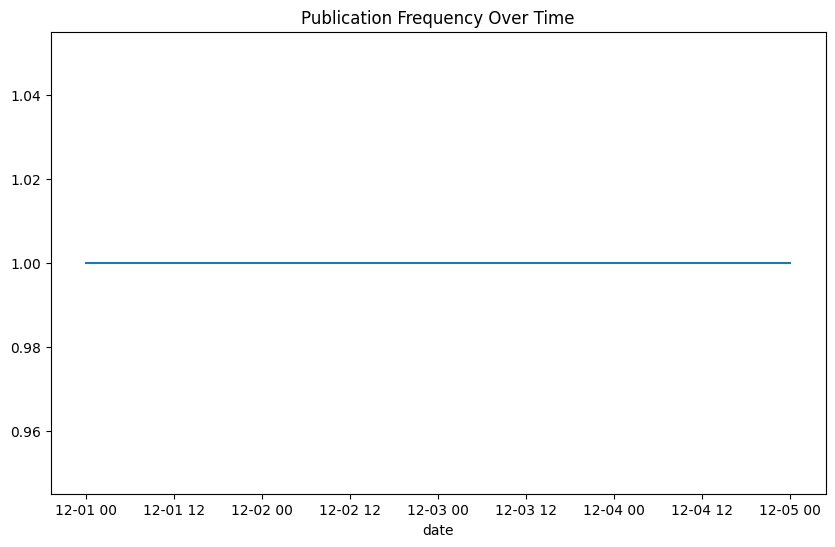

In [7]:
# Convert publication date to datetime
df['date'] = pd.to_datetime(df['date'])

# Group by publication date and count articles
daily_counts = df.groupby(df['date'].dt.date).size()

# Plot the publication frequency over time
daily_counts.plot(title="Publication Frequency Over Time", figsize=(10, 6))
plt.show()